# Visualization techniques for Convolutional Neural Networks

The goal of this lesson to provide insights into the deep neural networks to understand what they 'see' and how they make decisions. We work with pre-trained, very efficient models and try to understand their behaviours. 

Lots of interesting techniques are presented in [Zeiler, Fergus: Visualizing and Understanding Convolutional Networks, 2013](https://arxiv.org/abs/1311.2901)

We also need some sample images from the ImageNet dataset, for example we can download $200\times5$ samples from here: https://github.com/ajschumacher/imagen

In [1]:
#import tensorflow as tf
#tf.config.set_visible_devices([], "GPU")

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import vgg16
from keras.layers import Add, Input, Conv2D, Conv2DTranspose, UpSampling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, GlobalAveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.utils import plot_model
from keras import Model

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

vgg = vgg16.VGG16()

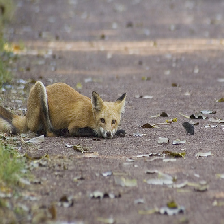

In [3]:
filename = "imagen/n02118333_12193_fox.jpg"

img = load_img(filename, target_size=(224, 224, 3))
img

Prepering the images:

- load the image with `load_img`
- convert to array with `img_to_array`
- reshape to the correct shape
- apply the corresponding VGG16 preprocess

In [4]:
from keras.applications.vgg16 import preprocess_input

def prepare_image(filename, width=224, height=224):
    return img_array

### What are the top predictions? What if we do a different preprocess?



## Create truncated models from the VGG layers

## Visualization of the feature maps

In [5]:
def plot_maps(preds, n=8):
    fig, axs = plt.subplots(n, n, figsize=(16, 16))
    cnt = 1
    for i1 in range(n):
        for i2 in range(n):
            axs[i1, i2].set_xticks([])
            axs[i1, i2].set_yticks([])
            axs[i1, i2].plot([1, 3],  [2, 3])
            cnt += 1
    plt.show()

## Layer 2

## Layer 8

## Layer 16

## Layer 17

## Maximum activations

We can use a trained model to predict on a large dataset and check the individual neurons to find the images that trigger it, i.e. images with the highest activation values. Thus we have truncate the final layer and analyze the outputs of the 4096-neuron dense layer.

- we read the files
- use the model for predictions

In [6]:
from tqdm import tqdm
import glob

files = glob.glob("imagen/*.jpg")
preds = []

In [7]:
def read_file(filename, width=224, height=224):
    img = img_to_array(load_img(filename, target_size=(width, height, 3))).reshape(1, width, height, 3) / 255
    return img

In [8]:
def plot_max_activations(idx, N=8):
    return

Further interesting experiments in the literature:

- [Feature visualizations](https://timsainburg.com/assets/feature_viz/VGG_classes.png)
- [Feature visualizations](https://timsainburg.com/assets/feature_viz/birds.png)
- [Intriguing properties of neural networks by Christian Szegedy et al.](https://arxiv.org/pdf/1312.6199)
- [Adverserial modifications](https://miro.medium.com/v2/resize:fit:1400/1*VMW1j6A_kh4LyuNFyEw3hw.png)

## TSNE visualization on the penultimate layer

In [9]:
from sklearn.manifold import TSNE


In [10]:
label = "fox"
special_indices = [idx for idx, file in enumerate(files) if \
                   file.endswith(label + ".jpg")]



### Scatter plot of the images

In [11]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

if 0:
    def getImage(filename):
        return OffsetImage(load_img(filename, target_size=(64, 64, 3)))
    
    x = P[:, 0]
    y = P[:, 1]
    
    fig, ax = plt.subplots(figsize=(32, 32))
    ax.scatter(x, y) 
    for x0, y0, file in zip(x, y, files):
        ab = AnnotationBbox(getImage(file), (x0, y0), frameon=False)
        ax.add_artist(ab)
        ax.set_xticks([])
        ax.set_yticks([])

In [12]:
if 0:
    def getImage(filename):
        img = load_img(filename, target_size=(64, 64, 3))
        return OffsetImage(img, alpha=0.5)  
    
    x = P[:, 0]
    y = P[:, 1]
    
    fig, ax = plt.subplots(figsize=(32, 32))
    ax.scatter(x, y, alpha=0.5)  
    for x0, y0, file in zip(x, y, files):
        ab = AnnotationBbox(getImage(file), (x0, y0), frameon=False)
        ax.add_artist(ab)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()


### Interactive Bokeh visualization

In [13]:
import pandas as pd
import bokeh
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, ZoomInTool, ZoomOutTool
from io import BytesIO
import base64
from bokeh.io import output_notebook , output_file

if 0:
    output_notebook()
    
    labels = [file.split("_")[-1].split(".")[0] for file in files]
    
    source = ColumnDataSource(
            data=dict(
                x = P[:, 0],
                y = P[:, 1],
                desc = labels,
                imgs = files
            )
        )
    
    hover = HoverTool(
            tooltips="""
            <div>
                <div>
                    <img
                        src="@imgs" height="128" alt="@imgs" width="128"
                        style="float: left; margin: 0px 15px 15px 0px;"
                        border="2"
                    ></img>
                </div>
                <div>
                    <span style="font-size: 17px; font-weight: bold;">@desc</span>
                    <span style="font-size: 15px; color: #966;">[$index]</span>
                </div>
                <div>
                    <span style="font-size: 15px;">Location</span>
                    <span style="font-size: 10px; color: #696;">($x, $y)</span>
                </div>
            </div>
            """
        )
    
    p = figure(width=800, height=800, tools=[hover, "pan, wheel_zoom, box_zoom, reset"],
               title="Mouse over the dots")
    
    p.scatter('x', 'y', size=10, source=source)
    
    show(p)
    
    output_file("interactive_tsne.html")


## Heatmap visualizations by occlusions

We can analyze the model's localization effects if we mask out certain parts of the image and look at the predictions. This way we can create a heatmap showing the effects of the pixels. We are going to need the [ImageNet label list](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a#file-imagenet1000_clsidx_to_labels-txt)

In [14]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import ast

d = ast.literal_eval(open("imagenet_labels.txt", "r").read())

inception = InceptionResNetV2(input_shape=(299, 299, 3))

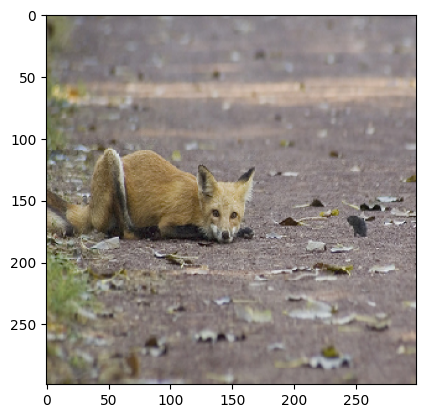

In [15]:
file = "imagen/n02118333_12193_fox.jpg"
target_w, target_h = 299, 299

img = read_file(file, target_w, target_h)
plt.imshow(img[0])

##  What are top predictions for the model?

### What if we occlude a small portion of the image?

In [16]:
from copy import deepcopy

start_w, start_h = 100, 120
window_w, window_h = 64, 64


## Let's move the occlusion window and see the top prediction of the model

In [17]:
step = 10

start_w_vec = np.arange(0, target_w - window_w, step)
start_h_vec = np.arange(0, target_h - window_h, step)

preds = []



## Let's count the top predictions

In [18]:
from collections import Counter


## Create a plot to visualize how the real class prediction changes with the moving window

In [19]:
special_index = 277



## Refine the localized predictions by taking the overlapping averages 

In [20]:
probs = np.zeros((target_w, target_h))
counts = np.zeros((target_w, target_h))


### Example #2

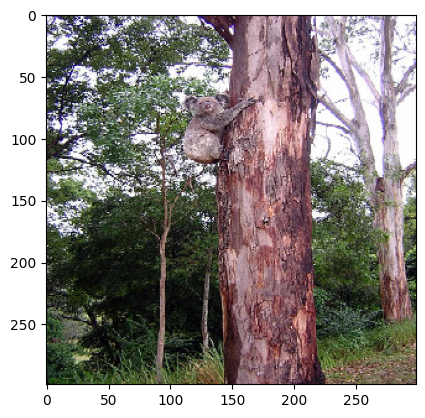

In [21]:
file = "imagen/n01882714_11334_koala_bear.jpg"

img = read_file(file, target_w, target_h)
plt.imshow(img[0])

### Example #3

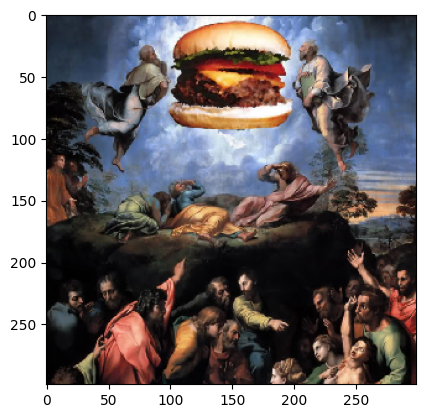

In [22]:
file = "imagen/n07697100_9282_hamburger.jpg"

img = read_file(file, target_w, target_h)
plt.imshow(img[0])
